### 1-1. PyTorch

PyTorch는 Python 기반의 오픈 소스 딥러닝 프레임워크로,

딥러닝에 필요한 계산들을 그래프로 정의하고 텐서(Tensor)를 이용하여 연산을 할 수 있도록 고안된 쉬운 사용성을 제공하는 프레임워크

In [1]:
# PyTorch와 시각화 도구 설치
!pip install torch torchvision torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 866.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [2]:
from torchviz import make_dot
from scipy.stats import norm
import torch
import matplotlib.pyplot as plt
import numpy as np

### 1-1-1. 텐서(Tensor) 사용하기

텐서는 딥러닝에서 데이터를 표현하는 기본 단위

In [3]:
# 1차원 텐서 생성
a = torch.tensor([1, 2, 3])
print(a)

# 2차원 텐서 생성
b = torch.tensor([[1, 2], [3, 4]])
print(b)

# 텐서의 크기 확인
print(b.size())

tensor([1, 2, 3])
tensor([[1, 2],
        [3, 4]])
torch.Size([2, 2])


### 1-1-2. 텐서 기본 연산

텐서 간에 기본 연산을 사용할 수 있음

In [4]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])

# 덧셈
z = x + y
print(z)

# 곱셈
z = x * y
print(z)

# 행렬 곱셈
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])
c = torch.matmul(a, b)
print(c)

tensor([5, 7, 9])
tensor([ 4, 10, 18])
tensor([[19, 22],
        [43, 50]])


### 1-1-3. 그래프 연산

파이토치는 텐서들을 그래프를 바탕으로 연산을 수행할 수 있음

시각화

In [5]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = torch.tensor([4.0, 5.0, 6.0], requires_grad=True)

# 덧셈
z = x + y
print(z)  # tensor([5, 7, 9])|

tensor([5., 7., 9.], grad_fn=<AddBackward0>)


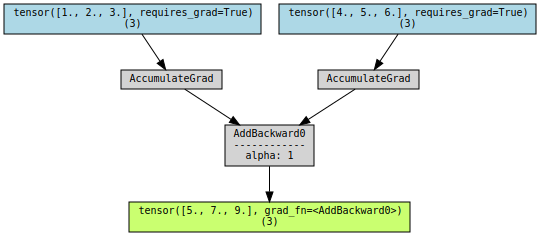

In [6]:
make_dot(z, params={x: x, y: y, z: z}, show_attrs=True, show_saved=True)

In [7]:
s = z.sum()

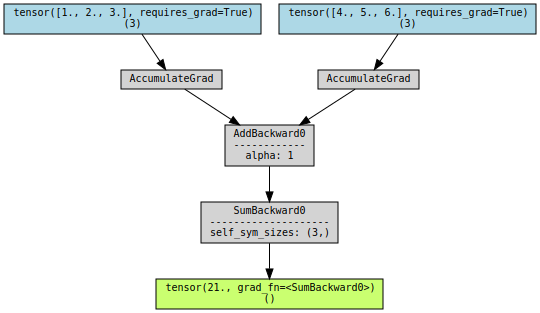

In [8]:
make_dot(s, params={x: x, y: y, z: z, s: s}, show_attrs=True, show_saved=True)

In [9]:
s.backward()

### 1-1-4. 텐서의 타입과 크기

각 텐서는 타입과 크기를 가짐

`.dtype`과 `.size()`으로 타입과 크기를 각각 확인

In [10]:
# 4x6 텐서 생성 (모든 요소를 0으로 초기화)
x = torch.zeros(4, 6)
print("0으로 채워진 텐서 x:")
print(x)
print(f"{x.dtype=}")
print(f"{x.size()=}")
print()

# 2x3 텐서 생성 (모든 요소를 1로 초기화)
y = torch.ones(2, 3)
print("1로 채워진 텐서 y:")
print(y)
print(f"{y.dtype=}")
print(f"{y.size()=}")
print()

# 주어진 값으로 초기화된 2x2 텐서 생성
z = torch.tensor([[1, 2], [3, 4]])
print("특정 값으로 채워진 텐서 z:")
print(z)
print(f"{z.dtype=}")
print(f"{z.size()=}")

0으로 채워진 텐서 x:
tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
x.dtype=torch.float32
x.size()=torch.Size([4, 6])

1로 채워진 텐서 y:
tensor([[1., 1., 1.],
        [1., 1., 1.]])
y.dtype=torch.float32
y.size()=torch.Size([2, 3])

특정 값으로 채워진 텐서 z:
tensor([[1, 2],
        [3, 4]])
z.dtype=torch.int64
z.size()=torch.Size([2, 2])


### 1-1-5. 텐서 변환

텐서는 용도에 따라 특정 차원이나 형태로 변환 가능

텐서에는 여러가지 변환 메소드를 제공

In [11]:
# 원본 텐서 (2x3 형태)
original_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
print("원본 텐서:")
print(original_tensor)
print()

# 텐서 크기 변경 (변형) - reshape
reshaped_tensor = original_tensor.reshape(3, 2)
print("reshape()를 사용하여 3x2 형태로 변형된 텐서:")
print(reshaped_tensor)
print()

# 텐서를 1차원으로 펼치기 - flatten
flattened_tensor = original_tensor.flatten()
print("flatten()을 사용하여 1차원으로 펼쳐진 텐서:")
print(flattened_tensor)
print()

# 특정 차원 추가 - unsqueeze
unsqueezed_tensor = original_tensor.unsqueeze(0)  # 0번 차원 추가
print("unsqueeze()를 사용하여 새로운 차원(0번) 추가:")
print(unsqueezed_tensor)
print("차원:", unsqueezed_tensor.shape)
print()

# 특정 차원 제거 - squeeze
# unsqueeze로 추가한 차원을 다시 제거
squeezed_tensor = unsqueezed_tensor.squeeze(0)
print("squeeze()를 사용하여 불필요한 차원(0번) 제거:")
print(squeezed_tensor)
print("차원:", squeezed_tensor.shape)
print()

# 텐서 형태 전치 (행과 열 교환) - transpose
transposed_tensor = original_tensor.transpose(0, 1)
print("transpose()를 사용하여 행과 열을 교환한 텐서:")
print(transposed_tensor)

원본 텐서:
tensor([[1, 2, 3],
        [4, 5, 6]])

reshape()를 사용하여 3x2 형태로 변형된 텐서:
tensor([[1, 2],
        [3, 4],
        [5, 6]])

flatten()을 사용하여 1차원으로 펼쳐진 텐서:
tensor([1, 2, 3, 4, 5, 6])

unsqueeze()를 사용하여 새로운 차원(0번) 추가:
tensor([[[1, 2, 3],
         [4, 5, 6]]])
차원: torch.Size([1, 2, 3])

squeeze()를 사용하여 불필요한 차원(0번) 제거:
tensor([[1, 2, 3],
        [4, 5, 6]])
차원: torch.Size([2, 3])

transpose()를 사용하여 행과 열을 교환한 텐서:
tensor([[1, 4],
        [2, 5],
        [3, 6]])


### 1-1-6. 텐서 연결과 분리

텐서는 파이썬의 리스트(List) 자료구조와 유사하게
텐서끼리 연결(Concatenate)하거나 분리(Split) 있음

In [12]:
# 두 텐서를 연결하기
tensor_a = torch.tensor([[1, 2], [3, 4]])
tensor_b = torch.tensor([[5, 6], [7, 8]])

# 세로 방향으로 연결
concat_tensor = torch.cat((tensor_a, tensor_b), dim=0)
print("텐서 연결 (세로 방향):")
print(concat_tensor)
print()

# 가로 방향으로 연결
concat_tensor_dim1 = torch.cat((tensor_a, tensor_b), dim=1)
print("텐서 연결 (가로 방향):")
print(concat_tensor_dim1)
print()

# 텐서 분리하기 (2 크기 단위로 분리)
# 세로 방향으로 분리
split_tensor = torch.split(concat_tensor, 2, dim=0)
print("텐서 분리 (세로 방향, Chunk 크기 2):")
for i, t in enumerate(split_tensor):
    print(f"Chunk {i+1}:\n{t}")
print()

# 텐서를 일정한 크기로 슬라이싱
# 첫 두 열만 슬라이싱
sliced_tensor = concat_tensor_dim1[:, :2]
print("텐서 슬라이싱 (첫 두 열):")
print(sliced_tensor)
print()

# 텐서를 특정 차원에서 나누기
tensor_c = torch.tensor([[1, 2, 3], [4, 5, 6]])

# 열 방향으로 3개로 분리
chunk_tensor = torch.chunk(tensor_c, 3, dim=1)
print("텐서 Chunk (가로 방향, 3개로 분리):")
for i, t in enumerate(chunk_tensor):
    print(f"Chunk {i+1}:\n{t}")

텐서 연결 (세로 방향):
tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

텐서 연결 (가로 방향):
tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])

텐서 분리 (세로 방향, Chunk 크기 2):
Chunk 1:
tensor([[1, 2],
        [3, 4]])
Chunk 2:
tensor([[5, 6],
        [7, 8]])

텐서 슬라이싱 (첫 두 열):
tensor([[1, 2],
        [3, 4]])

텐서 Chunk (가로 방향, 3개로 분리):
Chunk 1:
tensor([[1],
        [4]])
Chunk 2:
tensor([[2],
        [5]])
Chunk 3:
tensor([[3],
        [6]])


### 1-2. 기초 통계량의 이해

기초 통계량은 데이터의 중심 위치와 퍼짐 정도를 나타내며,

머신러닝에서 데이터 분포를 이해하고 전처리하는 데 필수

 평균, 중앙값, 분산 등의 통계량은 데이터 특성을 파악하고, 이상치 탐지나 정규화 결정에 중요한 역할

### 1-2-1. 평균 (Mean) 구하기

평균은 데이터의 요소 값을 모두 합한 뒤 요소 개수로 나누어 계산

데이터의 전반적인 경향을 파악하는 데 유용하지만, 이상치(outliers)가 있는 경우 평균 값이 왜곡될 수 있음

In [17]:
# 예제 데이터 생성
data = np.array([1.0, 2.0, 3.0, 4.0, 100.0])

# 평균 계산
mean_value = data.mean()
print("데이터의 평균:", mean_value.item())

데이터의 평균: 22.0


### 1-2-2. 중앙값 (Median)과 평균 비교하기

중앙값은 정렬된 데이터에서 중간에 위치한 값을 의미하며,

이상치에 영향을 덜 받음

In [18]:
# 중앙값 계산
median_value = np.median(data)
print("데이터의 중앙값:", median_value.item())

# 평균과 중앙값 비교
print("평균과 중앙값 비교:")
print("평균:", mean_value.item())
print("중앙값:", median_value.item())

데이터의 중앙값: 3.0
평균과 중앙값 비교:
평균: 22.0
중앙값: 3.0


### 1-2-3. 분산 (Variance) 구하기

분산은 각 데이터가 평균에서 얼마나 떨어져 있는지를 제곱해 평균을 구한 값으로,데이터의 퍼짐 정도를 나타냄

분산이 클수록 데이터가 넓게 퍼져 있는 것을 의미

이상치가 포함될 경우 분산이 크게 증가

In [20]:
# 이상치가 포함된 데이터
data_with_outlier = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 100])

# 이상치 포함된 데이터의 분산 계산
variance_with_outlier = np.var(data_with_outlier)
print("이상치 포함 데이터의 분산:", variance_with_outlier)

이상치 포함 데이터의 분산: 818.25


### 1-2-4. 표준편차 (Standard Deviation) 구하기

표준편차는 분산의 제곱근으로 계산되며, 데이터가 평균으로부터 얼마나 떨어져 있는지를 직관적으로 보여줌

표준편차는 원 데이터의 단위를 유지하므로 데이터의 퍼짐 정도를 이해하는 데 더 유용

In [21]:
# 예제 데이터 생성
data = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])

# 표준편차 계산
std_deviation = np.std(data)
print("데이터의 표준편차:", std_deviation)

데이터의 표준편차: 2.8722813232690143


### 1-2-5. 이상치 포함 데이터에서 표준편차 비교

 이상치는 표준편차를 크게 증가시켜 데이터의 분포에 영향을 줌

In [22]:
# 이상치가 포함된 데이터의 표준편차 계산
std_deviation_with_outlier = np.std(data_with_outlier)
print("이상치 포함 데이터의 표준편차:", std_deviation_with_outlier)

이상치 포함 데이터의 표준편차: 28.605069480775605


### 1-2-6. 정규분포와 분산 및 표준편차의 시각화

정규분포는 데이터가 평균을 중심으로 대칭적으로 분포하는 패턴을 보여주며, 분산과 표준편차는 분포의 퍼짐 정도를 나타냄

주어진 분산과 표준편차 값을 사용해 정규분포 곡선을 그려 데이터의 분포 특성을 직관적으로 파악할 수 있음

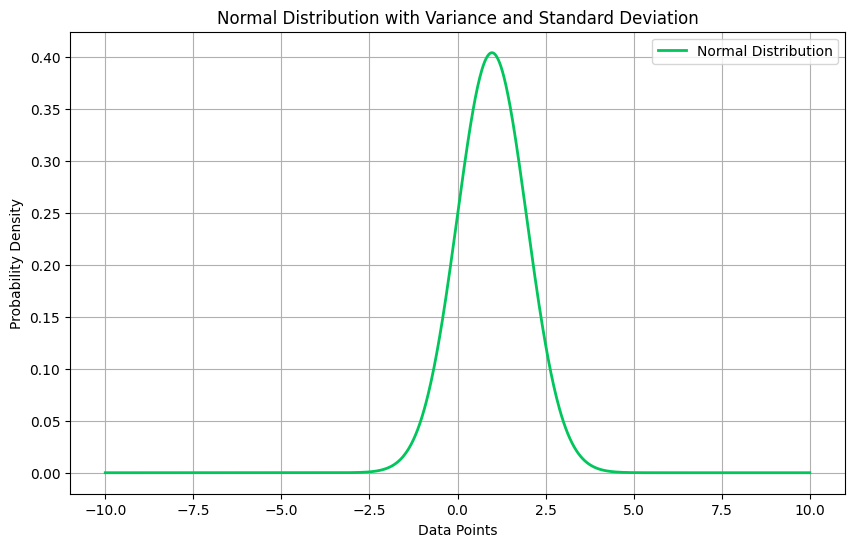

In [23]:
# 정규분포를 기반한 분산 및 표준편차 시각화
data = np.random.normal(0, 1, 1000)
variance = np.var(data)
std_dev = np.std(data)

x = np.linspace(-10, 10, 1000)
y = (1 / (np.sqrt(2 * np.pi * std_dev**2))) * np.exp(-0.5 * ((x - variance) / std_dev)**2)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution', linewidth=2, color="#01c65b")
plt.title("Normal Distribution with Variance and Standard Deviation")
plt.xlabel("Data Points")
plt.ylabel("Probability Density")
plt.grid(True)
plt.legend()
plt.show()

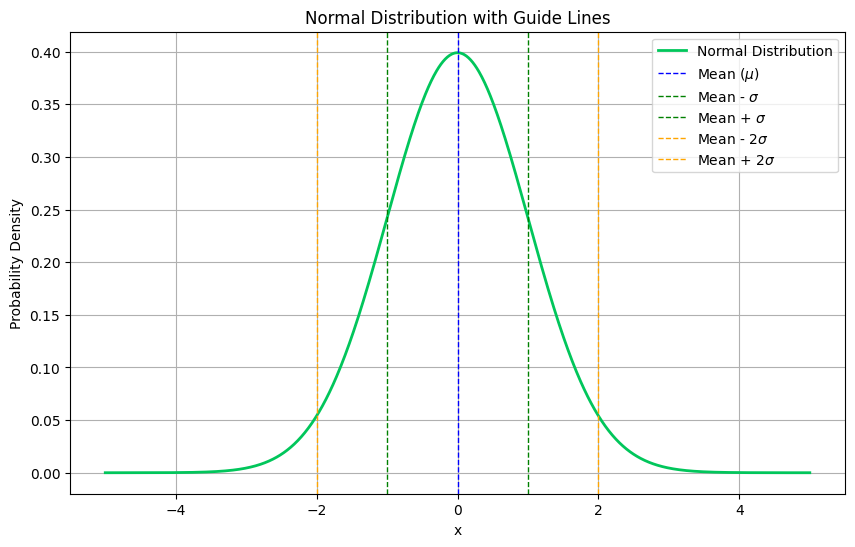

In [24]:
# 정규 분포 [혹은 가우시안 분포] (Normal distribution, Gaussian distribution)

mu = 0   # 평균 (mean)
sigma = 1 # 표준편차 (standard deviation)

x = np.linspace(-5, 5, 1000)
y = (1 / (np.sqrt(2 * np.pi * sigma**2))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Normal Distribution", linewidth=2, color="#01c65b")

plt.axvline(x=mu, color="blue", linestyle="--", linewidth=1, label="Mean ($\mu$)")
plt.axvline(x=mu - sigma, color="green", linestyle="--", linewidth=1, label="Mean - $\sigma$")
plt.axvline(x=mu + sigma, color="green", linestyle="--", linewidth=1, label="Mean + $\sigma$")
plt.axvline(x=mu - 2 * sigma, color="orange", linestyle="--", linewidth=1, label="Mean - 2$\sigma$")
plt.axvline(x=mu + 2 * sigma, color="orange", linestyle="--", linewidth=1, label="Mean + 2$\sigma$")

plt.title("Normal Distribution with Guide Lines")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.grid(True)
plt.legend()
plt.show()

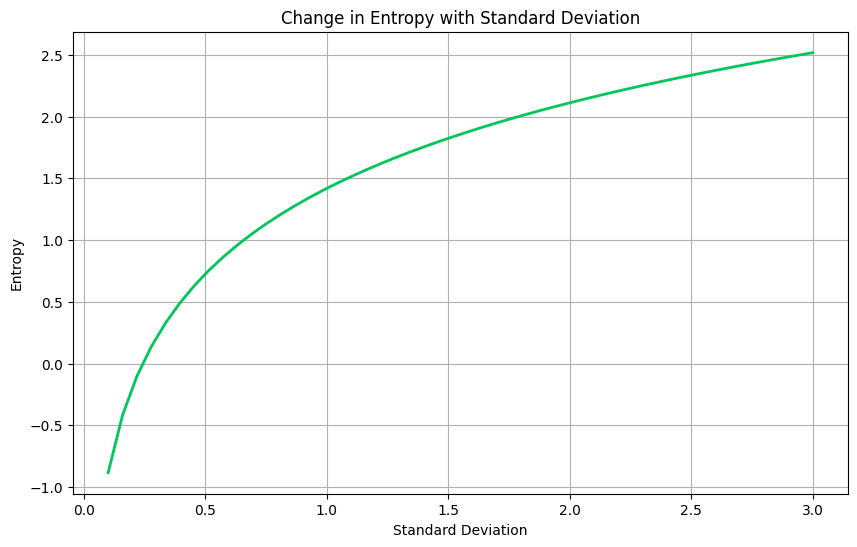

In [ ]:
std_devs = np.linspace(0.1, 3, 50)
entropies: list[float] = []

for std in std_devs:
    entropy = norm(scale=std).entropy()
    entropies.append(entropy)

plt.figure(figsize=(10, 6))
plt.plot(std_devs, entropies, linestyle="-", linewidth=2, color="#01c65b")
plt.title("Change in Entropy with Standard Deviation")
plt.xlabel("Standard Deviation")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()

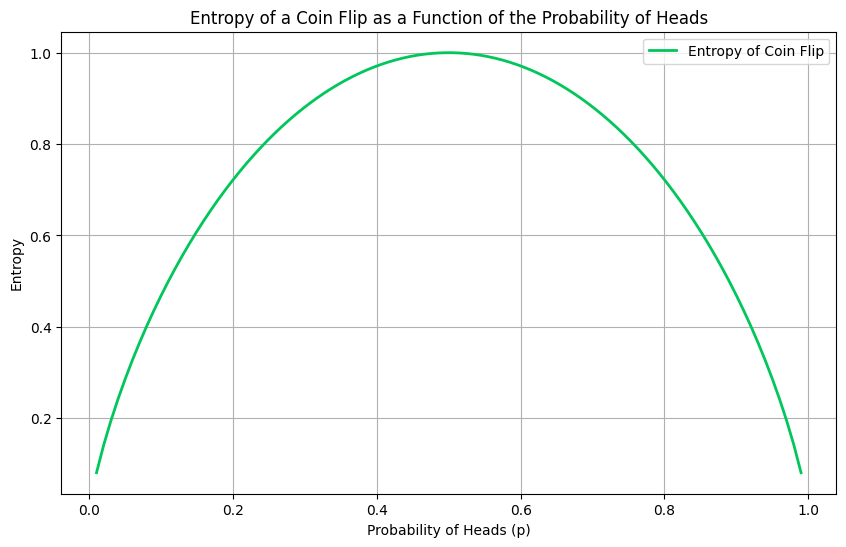

In [25]:
def entropy(p: float) -> float:
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# 동전 앞면 나올 확률 p의 범위
probabilities = np.linspace(0.01, 0.99, 100)

# 각 확률에 대한 엔트로피 계산
entropies = [entropy(p) if p not in [0, 1] else 0 for p in probabilities]

plt.figure(figsize=(10, 6))
plt.plot(probabilities, entropies, label='Entropy of Coin Flip', linewidth=2, color="#01c65b")
plt.title("Entropy of a Coin Flip as a Function of the Probability of Heads")
plt.xlabel("Probability of Heads (p)")
plt.ylabel("Entropy")
plt.grid(True)
plt.legend()
plt.show()

### 1-3. 응용: 선형 회귀 모델

선형 회귀 모델은 데이터의 독립 변수(x)와 종속 변수(y) 간 관계를 직선으로 표현하여, 새로운 데이터에 대한 예측이 가능.

평균과 분산 등의 기초 통계량을 활용해 데이터를 분석하며, 단순하면서도 해석이 쉬워 다양한 예측 모델에 활용됨


Epoch [100/1000], Loss: 0.4054
Epoch [200/1000], Loss: 0.2692
Epoch [300/1000], Loss: 0.2670
Epoch [400/1000], Loss: 0.2670
Epoch [500/1000], Loss: 0.2670
Epoch [600/1000], Loss: 0.2670
Epoch [700/1000], Loss: 0.2670
Epoch [800/1000], Loss: 0.2670
Epoch [900/1000], Loss: 0.2670
Epoch [1000/1000], Loss: 0.2670


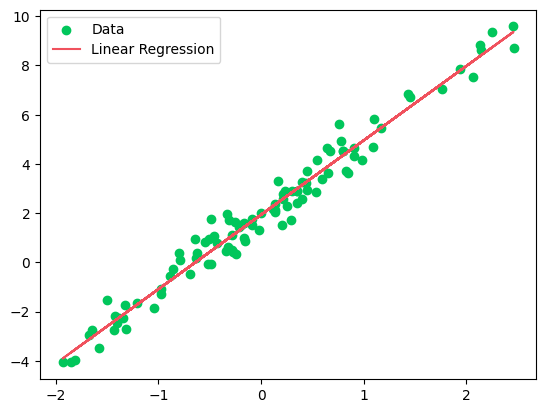

In [26]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 데이터 생성
x = torch.randn(100, 1)
y = 3 * x + 2 + torch.randn(100, 1) * 0.5  # 노이즈 추가

# 모델 정의
model = nn.Linear(1, 1)

# 손실 함수와 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 학습
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(x)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

# 결과 시각화
predicted = model(x).detach().numpy()
plt.scatter(x.numpy(), y.numpy(), color='#01c65b', label='Data')
plt.plot(x.numpy(), predicted, color='#f0515d', label='Linear Regression')
plt.legend()
plt.show()